# Performing Analysis & Predictive Modeling

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

In [2]:
#Removing Warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading CSV
df=pd.read_csv("DataAnalyst.csv")

## Data Understanding

In [4]:
#Displaying csv
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


In [5]:
# Checking shape of dataset
df.shape

(2253, 16)

In [6]:
#Displaying first 5 rows of dataset
df.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1


In [7]:
#Displaying last 5 rows of dataset
df.tail(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1
2252,2252,Senior Quality Data Analyst,$78K-$104K (Glassdoor est.),"You.\n\nYou bring your body, mind, heart and s...",3.4,SCL Health\n3.4,"Broomfield, CO","Broomfield, CO",10000+ employees,1864,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Centura Health, HealthONE, Denver Health and H...",-1


In [8]:
#Checking structural info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [9]:
#Checking statistical info of the dataset
df.describe()

,Unnamed: 0,Rating,Founded
count,2253.0000,2253.000000,2253.000000
mean,1126.0000,3.160630,1398.522858
std,650.5294,1.665228,901.929251
min,0.0000,-1.000000,-1.000000
25%,563.0000,3.100000,-1.000000
50%,1126.0000,3.600000,1979.000000
75%,1689.0000,4.000000,2002.000000
max,2252.0000,5.000000,2019.000000


In [10]:
df.describe(include="all")

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,2253.0000,2253,2253,2253,2253.000000,2252,2253,2253,2253,2253.000000,2253,2253,2253,2253,2253,2253
unique,NaN,1272,90,2253,NaN,1513,253,483,9,NaN,15,89,25,14,291,2
top,NaN,Data Analyst,$42K-$76K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,NaN,"Staffigo Technical Services, LLC\n5.0","New York, NY","New York, NY",51 to 200 employees,NaN,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1,-1
freq,NaN,405,57,1,NaN,58,310,206,421,NaN,1273,353,570,615,1732,2173
mean,1126.0000,NaN,NaN,NaN,3.160630,NaN,NaN,NaN,NaN,1398.522858,NaN,NaN,NaN,NaN,NaN,NaN
std,650.5294,NaN,NaN,NaN,1.665228,NaN,NaN,NaN,NaN,901.929251,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,563.0000,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1126.0000,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1689.0000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Checking unique values in "type of ownership" column
df["Type of ownership"].unique()

array(['Nonprofit Organization', 'Company - Private',
       'Subsidiary or Business Segment', 'Company - Public', 'Hospital',
       'Unknown', 'Contract', '-1', 'Government',
       'School / School District', 'Other Organization',
       'College / University', 'Self-employed', 'Private Practice / Firm',
       'Franchise'], dtype=object)

# Data Cleaning

In [12]:
#Dropping irrelevant columns
df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
#Checking for null values
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [14]:
#Dropping null values
df = df.dropna(subset=['Company Name'])

In [15]:
#Checking null values after deletion
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [16]:
#Checking for duplicate values
df.duplicated().sum()

0

## Feature Engineering

In [17]:
import re
df.replace({'Competitors': '-1', 'Easy Apply': '-1','Salary Estimate': '-1'}, np.nan, inplace=True)
df['Easy Apply'].fillna(False, inplace=True)
df['Competitors'].fillna("No competitor", inplace=True)
# Ensure 'Salary Estimate' is a string and remove non-numeric characters except "-"
df['Salary Estimate'] = df['Salary Estimate'].astype(str).apply(lambda x: re.sub(r'[^\dK-]', '', x))
# Extract Min and Max Salary properly
df[['Min Salary', 'Max Salary']] = df['Salary Estimate'].str.extract(r'(\d+)[Kk]?-(\d+)[Kk]?').astype(float)
median_min_salary = df['Min Salary'].median()
median_max_salary = df['Max Salary'].median()
df['Min Salary'].fillna(median_min_salary, inplace=True)
df['Max Salary'].fillna(median_max_salary, inplace=True)
# Compute Avg Salary
df['Avg Salary'] = (df['Min Salary'] + df['Max Salary']) / 2

In [18]:
# Clean 'Company Name' (removed rating from text)
df['Company Name'] = df['Company Name'].str.split('\n').str[0]
#Extracting values from skills, degree, experience elevel,Job Description
skills = ["Python", "SQL", "Tableau", "Excel", "Power BI", "Machine Learning", "Deep Learning", "NLP",
          "R", "Java", "C++", "Hadoop", "Spark", "AWS", "Google Cloud", "Azure"]
degrees = ["Bachelor", "Master", "PhD", "Degree", "B.S.", "M.S.", "MBA"]
experience_pattern = r"(\d+)[+-]? years?"
def extract_skills(text):
    found_skills = [skill for skill in skills if skill.lower() in text.lower()]
    return ", ".join(found_skills) if found_skills else "None"
def extract_degree(text):
    found_degrees = [deg for deg in degrees if deg.lower() in text.lower()]
    return ", ".join(found_degrees) if found_degrees else "Not specified"
def extract_experience(text):
    match = re.search(experience_pattern, text, re.IGNORECASE)
    return match.group(1) + " years" if match else "Not mentioned"
df["Skills"] = df["Job Description"].apply(extract_skills)
df["Degree Requirement"] = df["Job Description"].apply(extract_degree)
df["Experience Required"] = df["Job Description"].apply(extract_experience)
print(df[["Job Description", "Skills", "Degree Requirement", "Experience Required"]].head())
df['Remote Job'] = df['Job Description'].apply(lambda x: 1 if 'remote' in x.lower() or 'work from home' in x.lower() else 0)
df.drop(['Job Description', 'Headquarters'], axis=1, inplace=True)

                                     Job Description  \
0  Are you eager to roll up your sleeves and harn...   
1  Overview\n\nProvides analytical and technical ...   
2  We’re looking for a Senior Data Analyst who ha...   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...   

                           Skills             Degree Requirement  \
0             Python, SQL, R, AWS                  Not specified   
1                   SQL, Excel, R       Bachelor, Master, Degree   
2  Python, SQL, Tableau, Excel, R  Bachelor, Master, PhD, Degree   
3            SQL, Tableau, R, AWS               Bachelor, Degree   
4           Python, SQL, Excel, R               Bachelor, Degree   

  Experience Required  
0             2 years  
1       Not mentioned  
2       Not mentioned  
3             3 years  
4             2 years  


In [19]:
#Conerting categorical values to numeric
from category_encoders.target_encoder import TargetEncoder
from category_encoders.binary import BinaryEncoder
import joblib
df["Has Competitor"] = df["Competitors"].apply(lambda x: 0 if x == "No competitor" else 1)
df.drop("Competitors", axis=1, inplace=True)
df["Easy Apply"] = df["Easy Apply"].astype(bool).astype(int)
df["Seniority Level"] = df["Job Title"].apply(lambda x: "Senior" if "Senior" in x else "Junior" if "Junior" in x else "Mid")

In [20]:
degree_mapping = {
    "Not specified": "Not Specified",
    "Bachelor, Degree, B.S.": "Bachelor",
    "Bachelor": "Bachelor",
    "Bachelor, MBA": "Bachelor, MBA",
    "Bachelor, Master": "Bachelor, Master",
    "Bachelor, Master, MBA": "Bachelor, Master, MBA",
    "Master, Degree, B.S.": "Master",
    "Master": "Master",
    "Master, PhD": "Master, PhD",
    "PhD, Degree, M.S.": "PhD",
    "PhD": "PhD",
    "Bachelor, Master, PhD": "Bachelor, Master, PhD",
    "Bachelor, Master, Degree, MBA": "Bachelor, Master, MBA",
    "Bachelor, PhD, Degree": "Bachelor, PhD",
    "MBA": "MBA"
}
# Apply Mapping to Standardize Degrees
df["Degree Requirement"] = df["Degree Requirement"].replace(degree_mapping)

# Assign Ordinal Values (Based on Importance)
degree_order = {
    "Not Specified": 0,
    "Bachelor": 1,
    "Bachelor, MBA": 2,
    "Bachelor, Master": 3,
    "Bachelor, Master, MBA": 4,
    "Master": 5,
    "Master, PhD": 6,
    "PhD": 7,
    "Bachelor, Master, PhD": 8,
    "Bachelor, Master, MBA": 9,
    "Bachelor, PhD": 10,
    "MBA": 11
}

# Encode into Numeric Values
df["Degree Requirement"] = df["Degree Requirement"].map(degree_order).fillna(0).astype(int)

# Check Output
print(df["Degree Requirement"].unique())


[ 0  5  1  8  9 11  7  2  3 10  6]


In [21]:
# Count the number of skills in each row
df["Skill Count"] = df["Skills"].apply(lambda x: len(x.split(", ")) if x != "None" else 0)
df.drop(columns=["Skills"], inplace=True)

In [22]:
#Extracting data from "Experience Required"
df['Experience Required'] = df['Experience Required'].str.extract(r'(\d+)').astype(float)
df['Experience Required'].fillna(0, inplace=True)  # Fill missing values with 0

# Data Visualization

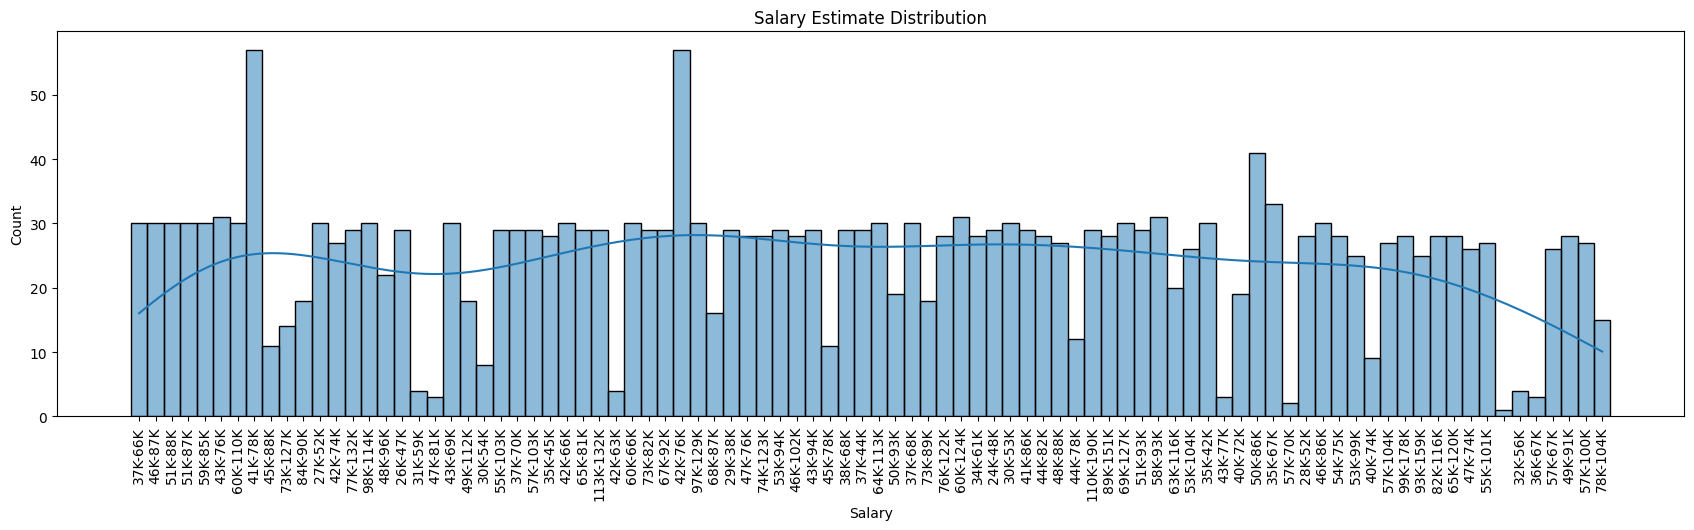

In [23]:
#Plotting Salary estimate
plt.figure(figsize=(21, 5))
sns.histplot(df['Salary Estimate'], kde=True, bins=20)
plt.title("Salary Estimate Distribution")
plt.xlabel("Salary")
plt.xticks(rotation=90)
plt.show()

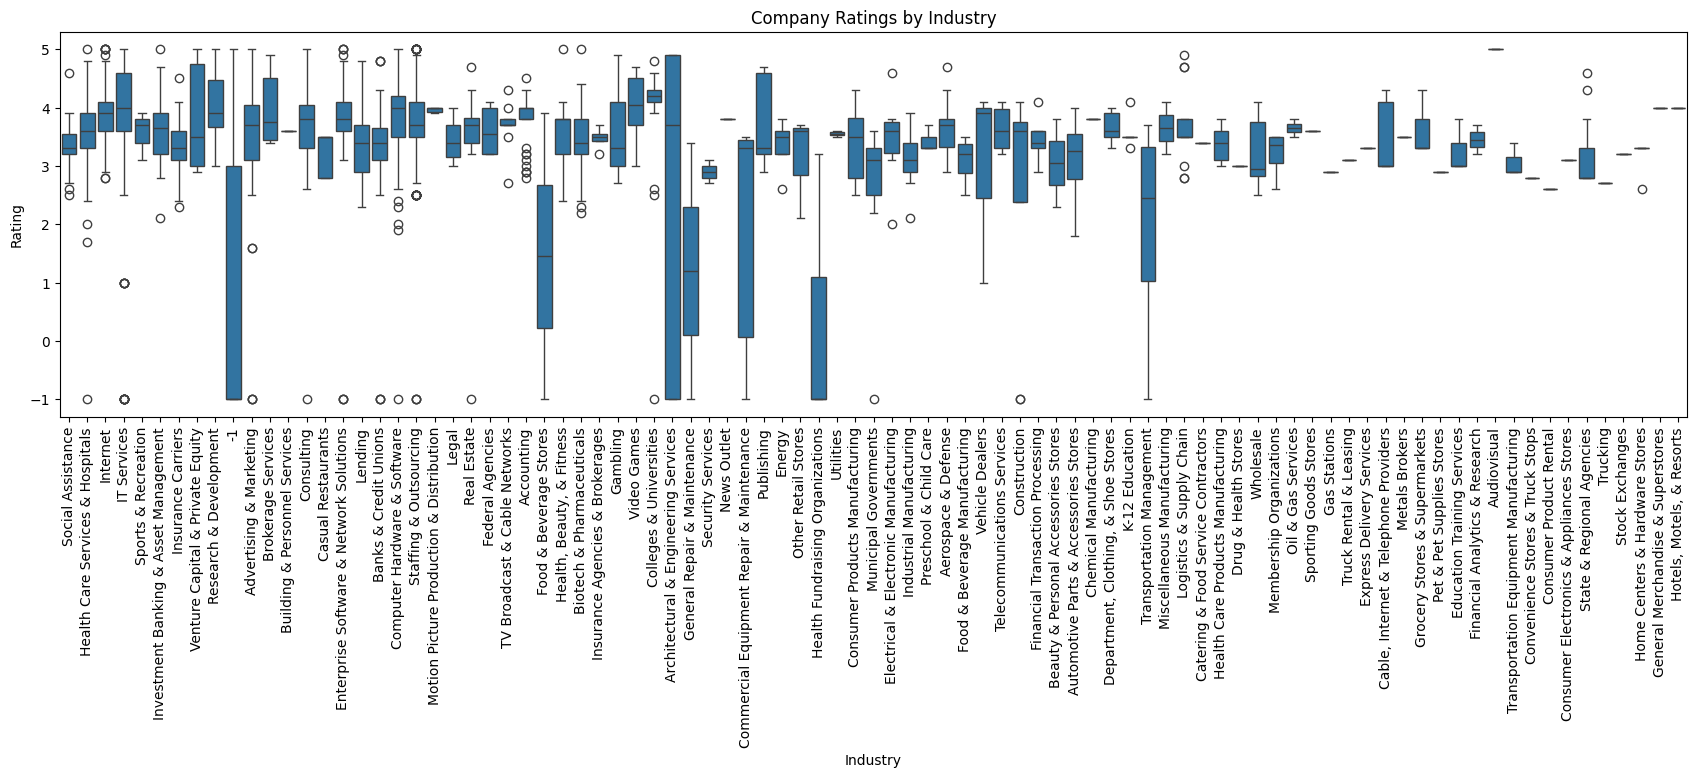

In [24]:
#Plotting company rating with respect to industry
plt.figure(figsize=(21, 5))
sns.boxplot(x='Industry', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title("Company Ratings by Industry")
plt.show()

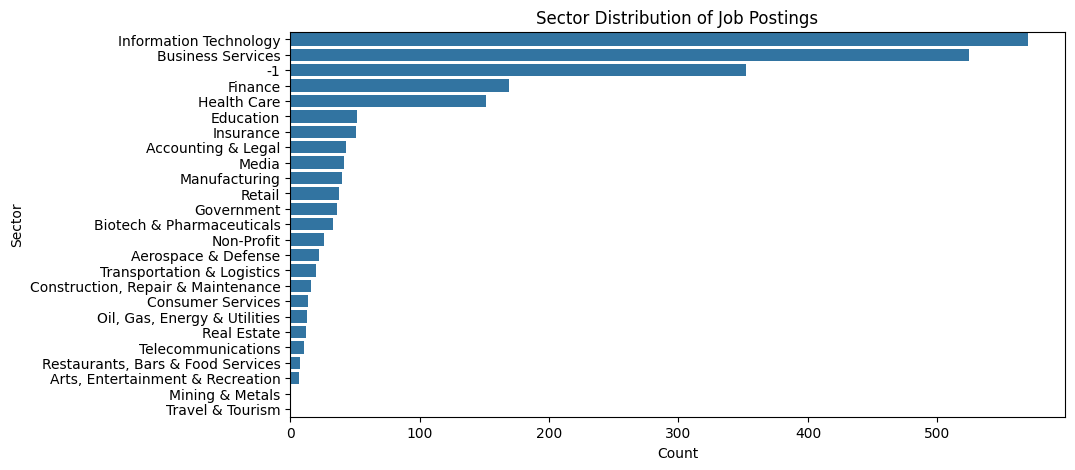

In [25]:
#Plotting Sector distribution 
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Sector"].value_counts().values,  
            y=df["Sector"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Sector")
plt.title("Sector Distribution of Job Postings")
plt.show()


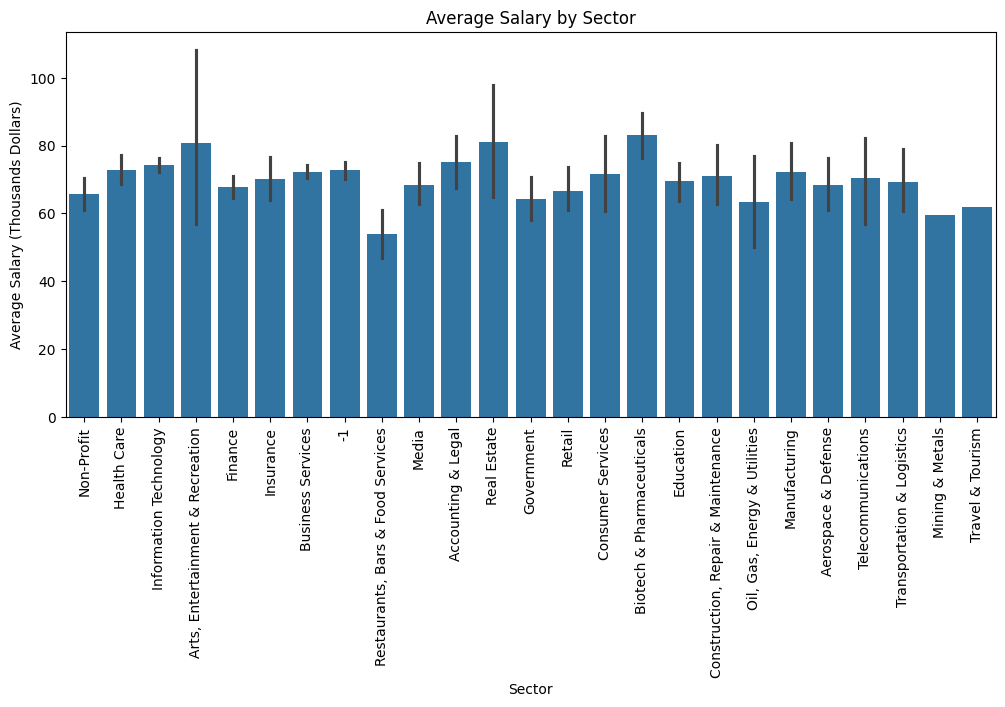

In [26]:
# Plotting average salary with respect to sector
plt.figure(figsize=(12, 5))
sns.barplot(x=df['Sector'], y=df['Avg Salary'])
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Average Salary (Thousands Dollars)')
plt.title('Average Salary by Sector')
plt.show()

In [27]:
# Dropping column
df.drop('Salary Estimate', axis=1, inplace=True)

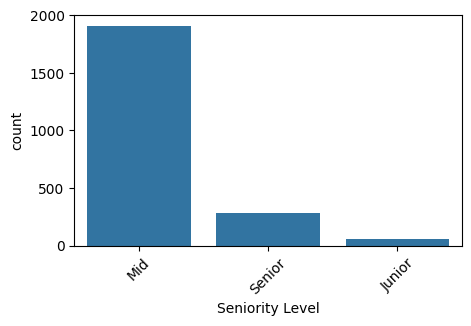

In [28]:
#Plot seniority count 
plt.figure(figsize=(5,3))
sns.countplot(data=df, x="Seniority Level", order=df["Seniority Level"].value_counts().index)
plt.xticks(rotation=45)
plt.show()

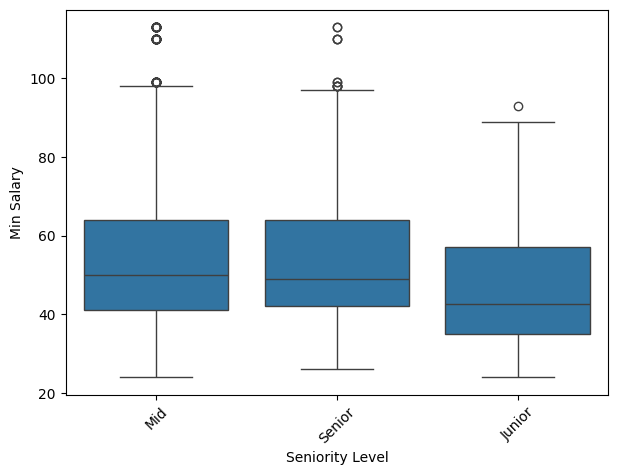

In [29]:
#Plotting boxplot for seniority level with respect to Min Salary
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Seniority Level", y="Min Salary")
plt.xticks(rotation=45)
plt.show()

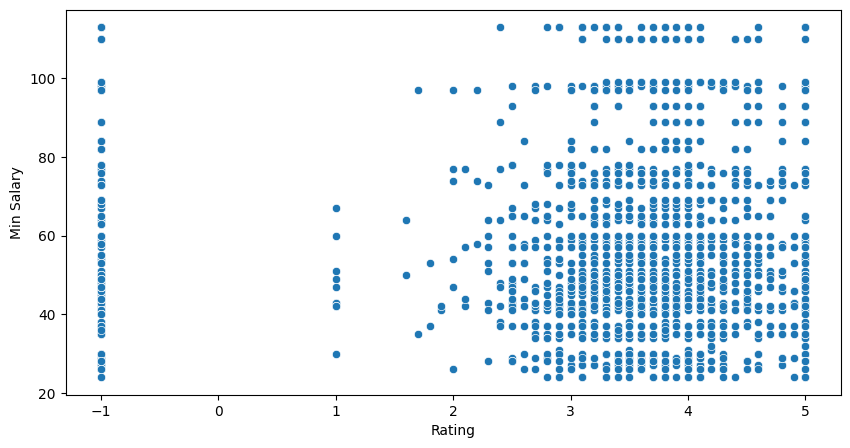

In [30]:
#Plotting scatter plot for Rating with respect to Min salary
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Rating"], y=df["Min Salary"])
plt.show()

In [31]:
seniority_mapping = {"Junior": 1, "Mid": 2, "Senior": 3}
df["Seniority Level"] = df["Seniority Level"].map(seniority_mapping)
target_enc_cols = ['Job Title', 'Company Name', 'Location','Industry']
target_encoder = TargetEncoder(cols=target_enc_cols)
df[target_enc_cols] = target_encoder.fit_transform(df[target_enc_cols], df['Avg Salary'])
joblib.dump(target_encoder, "target_encoder.pkl")

['target_encoder.pkl']

In [32]:
# Convert Size into numerical categories
df['Size'].replace('-1', 'Unknown', inplace=True)
df['Revenue'].replace('-1', 'Unknown / Non-Applicable', inplace=True)
size_mapping = {
    "Unknown": 0, "1 to 50 employees": 1, "51 to 200 employees": 2,
    "201 to 500 employees": 3, "501 to 1000 employees": 4,
    "1001 to 5000 employees": 5, "5001 to 10000 employees": 6, "10000+ employees": 7
}
df['Company Size Score'] = df['Size'].map(size_mapping)
revenue_mapping = {
    "Unknown / Non-Applicable": 0, "Less than $1 million (USD)": 1, "$1 to $5 million (USD)": 2,
    "$5 to $10 million (USD)": 3, "$10 to $25 million (USD)": 4, "$25 to $50 million (USD)": 5,
    "$50 to $100 million (USD)": 6, "$100 to $500 million (USD)": 7, "$500 million to $1 billion (USD)": 8,
    "$1 to $2 billion (USD)": 9, "$2 to $5 billion (USD)": 10, "$5 to $10 billion (USD)": 11, "$10+ billion (USD)": 12
}
df['Revenue Score'] = df['Revenue'].map(revenue_mapping)

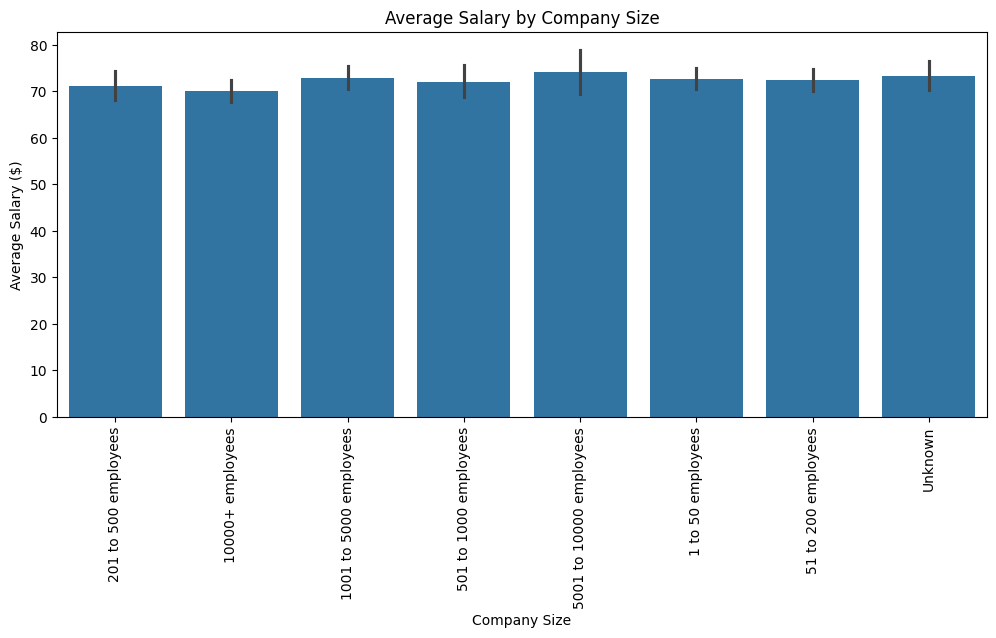

In [33]:
#Plot Average salary with respect to company size
plt.figure(figsize=(12, 5))
sns.barplot(x=df['Size'], y=df['Avg Salary'])
plt.xlabel('Company Size')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Company Size')
plt.xticks(rotation=90)
plt.show()

In [34]:
#Dropping any irrelevant columns
df.drop(columns=['Size', 'Revenue'], inplace=True)

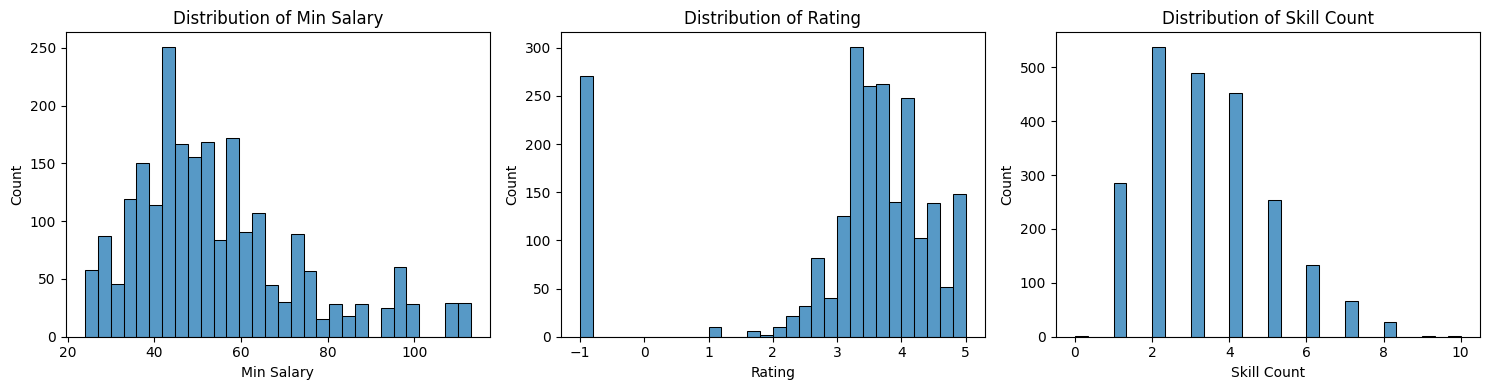

In [35]:
#Creating histplot to check distributions
num_cols = ["Min Salary", "Rating", "Skill Count"]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # Create 1 row, 3 columns of subplots
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

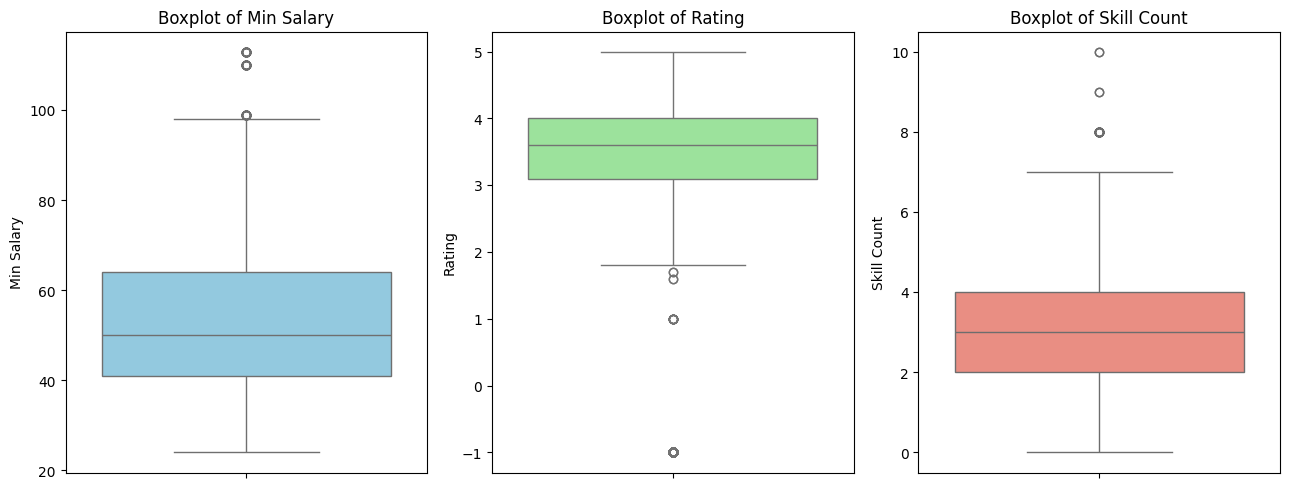

In [36]:
#Plotting boxplot to check outliers for Min Salary,Rating,Skill Count
num_cols = ["Min Salary", "Rating", "Skill Count"]
colors = ["skyblue", "lightgreen", "salmon"]  # Define colors for each plot
fig, axes = plt.subplots(1, 3, figsize=(13, 5))  # 1 row, 3 columns
for i, (col, color) in enumerate(zip(num_cols, colors)):
    sns.boxplot(y=df[col], ax=axes[i], color=color)
    axes[i].set_title(f"Boxplot of {col}")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [37]:
#Converting "Type of ownership" and "Sector" from categorical to numeric
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["Type of ownership", "Sector"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le  
print(df.head())
for col in categorical_cols:
    print(f"Label Encoding Mapping for {col}:")
    print(dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_))))

   Job Title  Rating  Company Name   Location  Founded  Type of ownership  \
0  69.436877     3.2     69.436877  71.235484     1961                  8   
1  68.403973     3.8     69.436877  71.235484     1893                  8   
2  69.436877     3.4     69.436877  71.235484     2003                  2   
3  72.576733     4.1     69.436877  71.235484     2002                 13   
4  71.509069     3.9     69.436877  71.235484     2009                  2   

    Industry  Sector  Easy Apply  Min Salary  Max Salary  Avg Salary  \
0  68.129732      17           1        37.0        66.0        51.5   
1  72.807946      11           0        37.0        66.0        51.5   
2  79.578676      12           0        37.0        66.0        51.5   
3  71.349231      12           0        37.0        66.0        51.5   
4  74.598375       3           1        37.0        66.0        51.5   

   Degree Requirement  Experience Required  Remote Job  Has Competitor  \
0                   0         

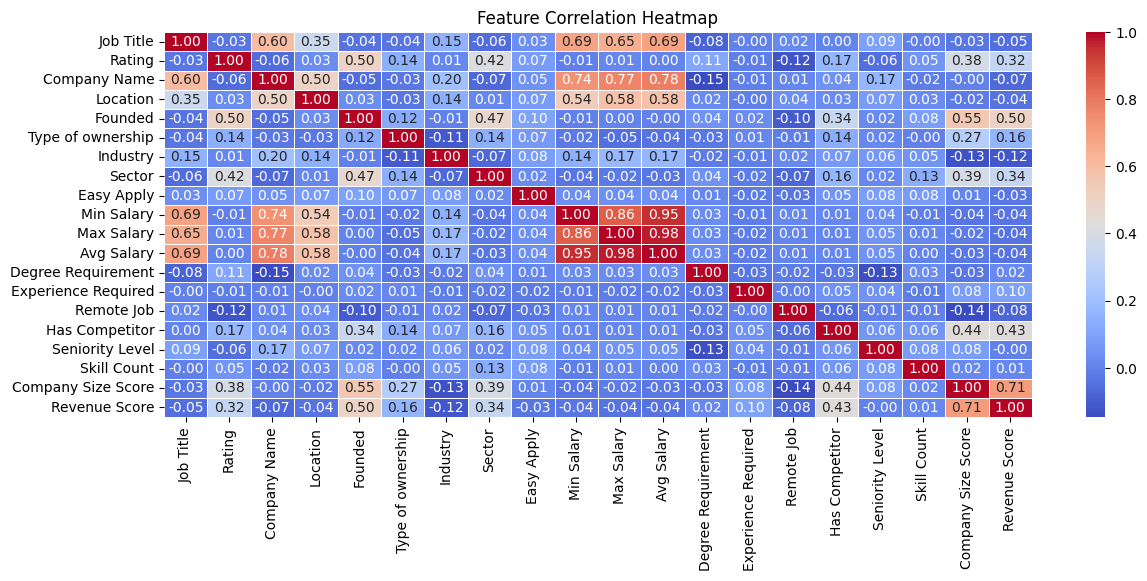

In [38]:
#Plotting heatmap to check correlation between variables
df_encoded = df.select_dtypes(include=[np.number])  
corr_matrix = df_encoded.corr()
plt.figure(figsize=(14, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Model Building & Evaluation

In [39]:
import joblib
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = df.drop(columns=['Avg Salary']) 
y = df['Avg Salary']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
corr_matrix = X_train.corr()
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.85:
            high_corr_features.add(corr_matrix.columns[i])
X_train.drop(columns=high_corr_features, inplace=True)
X_test.drop(columns=high_corr_features, inplace=True)
#  Recursive Feature Elimination (RFE)
model = LinearRegression()
rfecv = RFECV(model, step=1, cv=5)
rfecv.fit(X_train, y_train)
selected_features = X_train.columns[rfecv.support_]
# Keep only selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]
print(" Features used during training:", selected_features)
rf_params = {
    "n_estimators": 400, 
    "max_depth": 8, 
    "max_features": "sqrt",
    "min_samples_split": 10,  
    "min_samples_leaf": 4,  
    "bootstrap": True
}
xgb_params = {
    "n_estimators": 1200,  
    "max_depth": 3,  
    "learning_rate": 0.025, 
    "subsample": 0.7,  
    "colsample_bytree": 0.7,  
    "reg_alpha": 10,  
    "reg_lambda": 15  
}
gb_params = {
    "n_estimators": 1200,  
    "max_depth": 2,  
    "learning_rate": 0.025,  
    "subsample": 0.7,  
    "min_samples_split": 20,  
    "min_samples_leaf": 8 
}
lgbm_params = {
    "n_estimators": 1200,  
    "max_depth": 3,  
    "learning_rate": 0.025,  
    "subsample": 0.7,  
    "min_data_in_leaf": 50,  
    "lambda_l1": 10,  
    "lambda_l2": 15  
}
rf_model = RandomForestRegressor(**rf_params, random_state=42)
xgb_model = XGBRegressor(**xgb_params, objective="reg:squarederror", random_state=42)
gb_model = GradientBoostingRegressor(**gb_params, random_state=42)
lgbm_model = LGBMRegressor(**lgbm_params, random_state=42, verbose=-1)
#  Cross-validation settings
cv = KFold(n_splits=5, shuffle=True, random_state=42)
#  Model Evaluation Function
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae = mean_absolute_error(y_test, y_test_pred)
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    r2_cv = np.mean(cv_scores)
    print(f"\n {name} Performance:")
    print(f"  - Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}, CV R²: {r2_cv:.4f}")
    print(f"  - RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    return r2_test, r2_cv
# Evaluate All Models
r2_rf, cv_rf = evaluate_model(rf_model, "RandomForest")
r2_xgb, cv_xgb = evaluate_model(xgb_model, "XGBoost")
r2_gb, cv_gb = evaluate_model(gb_model, "GradientBoosting")
r2_lgbm, cv_lgbm = evaluate_model(lgbm_model, "LightGBM")


 Features used during training: Index(['Job Title', 'Rating', 'Company Name', 'Location', 'Easy Apply',
       'Min Salary', 'Degree Requirement', 'Remote Job', 'Has Competitor',
       'Seniority Level', 'Skill Count'],
      dtype='object')

 RandomForest Performance:
  - Train R²: 0.9699, Test R²: 0.9643, CV R²: 0.9543
  - RMSE: 4.4874, MAE: 3.1076

 XGBoost Performance:
  - Train R²: 0.9866, Test R²: 0.9823, CV R²: 0.9778
  - RMSE: 3.1586, MAE: 2.2510

 GradientBoosting Performance:
  - Train R²: 0.9832, Test R²: 0.9800, CV R²: 0.9768
  - RMSE: 3.3593, MAE: 2.4626

 LightGBM Performance:
  - Train R²: 0.9844, Test R²: 0.9804, CV R²: 0.9766
  - RMSE: 3.3235, MAE: 2.2513


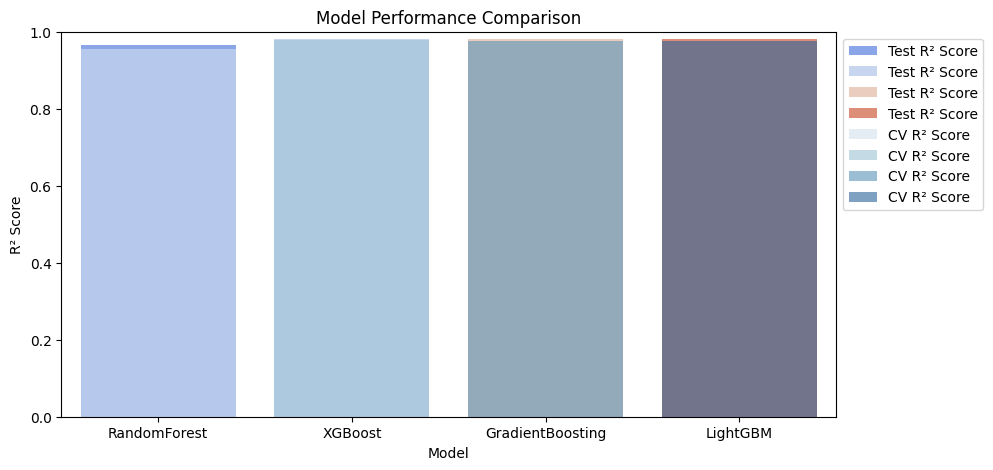

['best_gb_model.pkl']

In [43]:
# Compare Model Performance
models = ["RandomForest", "XGBoost", "GradientBoosting", "LightGBM"]
r2_scores_test = [r2_rf, r2_xgb, r2_gb, r2_lgbm]
r2_scores_cv = [cv_rf, cv_xgb, cv_gb, cv_lgbm]
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=r2_scores_test, palette="coolwarm", label="Test R² Score")
sns.barplot(x=models, y=r2_scores_cv, palette="Blues", alpha=0.6, label="CV R² Score")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()
#  Save Best Model
joblib.dump(xgb_model, "best_gb_model.pkl")

In [41]:
#Predicting sample output using sample input
import joblib
from category_encoders.target_encoder import TargetEncoder
best_gb = joblib.load("best_gb_model.pkl") 
selected_features = [
    "Job Title", "Rating", "Company Name", "Location", "Easy Apply",
    "Min Salary", "Degree Requirement", "Remote Job", "Has Competitor",
    "Seniority Level", "Skill Count"
]  
sample_input = {
    "Job Title": "Data Analyst, Center on Immigration and Justice (CIJ)",
    "Rating": 3.2,
    "Company Name":"Vera Institute of Justice",
    "Location":"New York, NY",
    "Easy Apply": 1,
    "Min Salary": 87.0,
    "Degree Requirement": "Not Specified",
    "Remote Job": 0,
    "Has Competitor": 0,
    "Seniority Level": "Mid",
    "Skill Count": 4,
    "Industry":"Social Assistance"
}
seniority_mapping = {"Junior": 1, "Mid": 2, "Senior": 3}
sample_input["Seniority Level"] = seniority_mapping.get(sample_input["Seniority Level"], 0)
degree_order = {
    "Not Specified": 0, "Bachelor": 1, "Bachelor, MBA": 2, "Bachelor, Master": 3,
    "Bachelor, Master, MBA": 4, "Master": 5, "Master, PhD": 6, "PhD": 7,
    "Bachelor, Master, PhD": 8, "Bachelor, PhD": 10, "MBA": 11
}
sample_input["Degree Requirement"] = degree_order.get(sample_input["Degree Requirement"], 0)
sample_df = pd.DataFrame([sample_input])
target_encoder = joblib.load("target_encoder.pkl")  
target_encoded_cols = ["Job Title", "Company Name", "Location","Industry"]
sample_df[target_encoded_cols] = target_encoder.transform(sample_df[target_encoded_cols])
sample_df = sample_df[selected_features]  
predicted_salary = best_gb.predict(sample_df)
print(f"💰 Predicted Salary: ${predicted_salary[0]:,.2f}")

💰 Predicted Salary: $91.43
